<a href="https://colab.research.google.com/github/Sompote/Constitutive-Model/blob/master/Stress_strainMC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
'''
Forward integration for Mohr Coulomb Model
by Dr. Sompote Youwai
KMUTT
2020
'''
#parameter
M=1
Mp=0.5
G=5000
K=9000

#numerical integration
q=0
p=200
es=0
ev=0
eslist=[0.]
evlist=[0.]
qlist =[0.]
plist = [0.]
#forward integration
incre=.0001 #strain increment
laststrain=.2 #maximum strain
while es < laststrain:
  if q < (M*p): #elastic 
    des=incre
    es=es+des
    dq=des*(3*G)
    q=q+dq
    dp=dq/3
    p=p+dp
    dev=dp/K
    ev=ev+dev
  
  else: #plastic
    des=incre
    es=es+des
    dev=-Mp*des
    ev=ev+dev
  
  #add data to list
  eslist.append(es)
  evlist.append(ev)
  qlist.append(q)
  plist.append(p) 
   

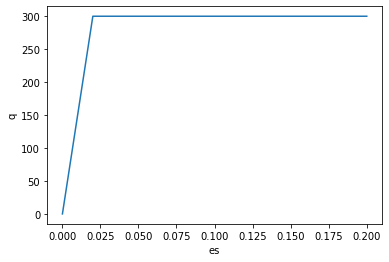

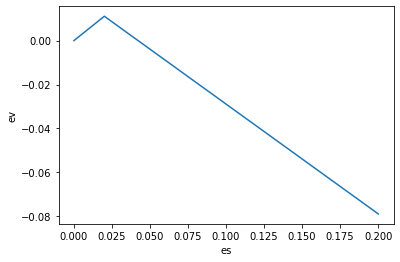

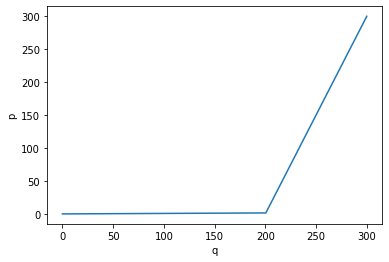

In [0]:
import matplotlib.pyplot as plt
plt.plot(eslist,qlist)
plt.ylabel('q')
plt.xlabel('es')
plt.show()
plt.plot(eslist,evlist)
plt.ylabel('ev')
plt.xlabel('es')
plt.show()
plt.plot(plist,qlist)
plt.ylabel('p')
plt.xlabel('q')
plt.show()

In [0]:
#write to excel file
import pandas as pd 
d = {'q': qlist, 'p': plist, 'es': eslist, 'ev': evlist}
df = pd.DataFrame(data=d)
df.to_excel("output.xlsx") 